# Використання моделі тайм серії. Prophet

**Таймсерії** — це послідовність даних, записаних у хронологічному порядку, де кожна точка представляє значення змінної в певний момент часу. Таймсерії широко використовуються у фінансах, економіці, аналізі погодних умов, маркетингу та інших галузях для відстеження змін і прогнозування майбутніх значень. Головною особливістю таймсерій є те, що дані залежать від часу, і саме цей аспект робить їх аналіз унікальним. Задачі аналізу таймсерій включають пошук трендів, виявлення сезонності, аномалій, а також побудову прогнозів на основі історичних даних.

### Prophet
Бібліотека Prophet розроблена Facebook працює на основі адитивної моделі часових рядів, яка поділяє часові дані на три основні компоненти: тренд, сезонність і залишковий шум. Ця модель описується формулою:

y(t) = g(t) + s(t) + h(t) + e(t)

де
* g(t) — тренд, що моделює довгострокові зміни в даних;
* s(t) — сезонність, яка враховує періодичні коливання;
* h(t) — ефекти свят або інших важливих дат;
* e(t) — залишковий шум або помилки.

1. g(t) - у бібліотеці Prophet моделюється двома підходами. Лінійний тренд g(t) = kt + m. де k - нахил лінії (градієнт), a m - зсув (intercept). Логістичний тренд (коли дані мають природне обмеження) g(t) = C/(1 + e^(-k*(t-m))). С - максимальне значення (обменження). k - шкидкість зростання, а m - тояка насичення.
2. s(t) - моделюється за допомогою гармонічних функцій (метод Фур'є)
3. h(t) - еффекти свят додаються у вигляді бінарних зиінних. h(t) = Y1\*I1(t) + Y2\*I2(t) + ... + Yi\*Ii(t). де Ii(t) — індикатор, який дорівнює 1, якщо t відповідає святу *i*, і 0 в іншому випадку, Yi — вплив свята *i* на дані (оцінюється з історичних даних).

15:05:20 - cmdstanpy - INFO - Chain [1] start processing
15:05:20 - cmdstanpy - INFO - Chain [1] done processing


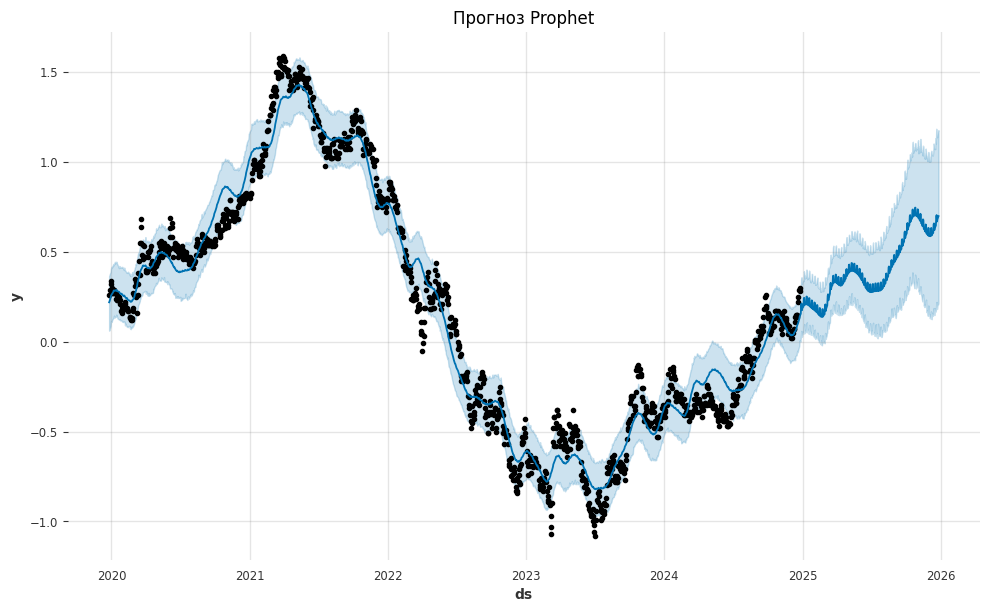

In [9]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Завантаження набору даних
data = pd.read_csv('T10Y2Y.csv')

# Підготовка даних для Prophet
prophet_data = data[['observation_date', 'T10Y2Y']].rename(columns={
    'observation_date': 'ds', 'T10Y2Y': 'y'
})

# Видалення пропущених значень для Prophet
prophet_data.dropna(inplace=True)

# Моделювання за допомогою Prophet
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Створення майбутньої таблиці даних
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)

# Побудова графіка результатів Prophet
fig = prophet_model.plot(forecast)
plt.title('Прогноз Prophet')
plt.show()



### Побудова компонентного аналізу

 Побудова компонентного аналізу — це процес розділення загального прогнозу часових рядів на окремі складові: тренд, сезонність і вплив свят або подій. Цей аналіз допомагає зрозуміти, як кожна з цих частин впливає на загальний прогноз.

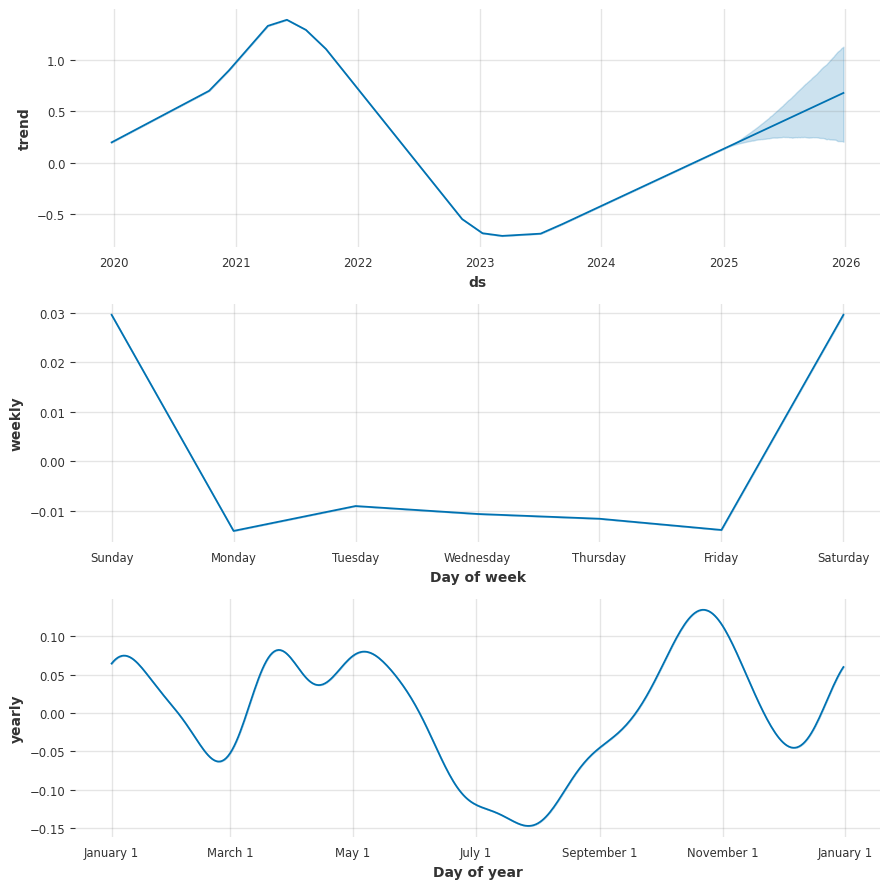

In [10]:
# Побудова компонентного аналізу
fig = prophet_model.plot_components(forecast)
plt.show()


Цей графік — результат компонентного аналізу Prophet, що показує окремі складові прогнозу:

1. Тренд (Trend): Перший підграфік показує довгострокову зміну даних. У цьому прикладі видно, що дані мали зростання до 2022 року, потім спад, а після 2024 року модель прогнозує нове зростання. Світло-синя зона — це інтервал довіри прогнозу, що показує можливі варіації.

2. Тижнева сезонність (Weekly): Другий підграфік показує, як дані змінюються протягом тижня. Наприклад, у цьому випадку значення вище у неділю та суботу, а найнижчі значення спостерігаються в понеділок.
Це може бути важливим для даних, залежних від дня тижня (наприклад, продажі чи веб-трафік).

3. Річна сезонність (Yearly): Третій підграфік показує сезонні коливання протягом року. Наприклад, у цьому графіку видно підвищення значень у зимові місяці (листопад-грудень) і зниження в літній період (червень-липень).


### Висновок
Prophet — це потужний інструмент для прогнозування часових рядів, що комбінує тренди, сезонність і вплив важливих дат. Завдяки використанню адаптивних методів, зокрема розкладу Фур'є для сезонності, модель здатна точно відображати складні залежності у даних. Його простота та гнучкість роблять Prophet ідеальним для бізнес-аналітики та наукових досліджень.